<a href="https://colab.research.google.com/github/rkdus5485/study/blob/master/pca_n%3D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:

train=[]
ori_train=[]
for i in range(1,36):
  path = '/content/drive/MyDrive/att_faces/s'+str(i)
  file_list = os.listdir(path)
  
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      ori_train.append(a)
      a_1=a.reshape(112*92,)
      train.append(a_1)
      
train=np.asarray(train)
ori_train = np.asarray(ori_train)

In [5]:

test=[]
ori_test=[]
for i in range(36,41):
  path = '/content/drive/MyDrive/att_faces/s'+str(i)
  file_list = os.listdir(path)
  
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      ori_test.append(a)
      a_1=a.reshape(112*92,)
      test.append(a_1)
      
test=np.asarray(test)
ori_test = np.asarray(ori_test)

In [6]:
print(train, train.shape)

[[ 34  34  33 ...  37  40  33]
 [ 44  43  32 ...  43  43  37]
 [ 39  44  53 ...  29  26  29]
 ...
 [ 84  96 101 ...  36  57  55]
 [ 91  83  70 ... 171 188 190]
 [ 92  93  96 ... 192 163 157]] (350, 10304)


In [7]:
print(ori_train, ori_train.shape)

[[[ 34  34  33 ...   1   1   1]
  [ 35  30  32 ...  38  47  39]
  [ 34  28  31 ...  55  59  49]
  ...
  [ 30  29  31 ...  35  37  41]
  [ 31  29  32 ...  42  34  39]
  [ 28  33  27 ...  37  40  33]]

 [[ 44  43  32 ...  52  48  52]
  [ 44  38  33 ...  51  51  54]
  [ 41  42  29 ...  50  53  53]
  ...
  [ 39  37  39 ...  41  37  37]
  [ 41  41  38 ...  44  36  32]
  [ 40  36  42 ...  43  43  37]]

 [[ 39  44  53 ...  47  48  47]
  [ 44  44  61 ...  47  45  46]
  [ 59  39  57 ...  46  46  44]
  ...
  [ 49  46  42 ...  30  32  28]
  [ 46  35  34 ...  30  29  27]
  [ 32  37  27 ...  29  26  29]]

 ...

 [[ 84  96 101 ...  91  84  86]
  [ 94  93  93 ...  95  90  83]
  [ 94  96  87 ...  97  95  91]
  ...
  [193 196 202 ...  59  64  69]
  [190 195 199 ...  40  69  58]
  [191 191 197 ...  36  57  55]]

 [[ 91  83  70 ... 162 161 157]
  [ 82  81  72 ... 148 165 162]
  [ 86  74  70 ... 138 164 168]
  ...
  [ 54  50  52 ... 156 181 193]
  [ 52  51  51 ... 165 186 195]
  [ 48  56  45 ... 171 188 1

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=10)

In [10]:
train_reduced = pca.fit_transform(train)
train_reduced.shape

(350, 10)

In [11]:
train_reduced

array([[ 2427.41409877,  1112.8664108 ,   475.98850243, ...,
         -645.58240773,   452.01050772,  -453.84625049],
       [ 2634.66330693,   616.7191901 ,   603.01857203, ...,
          344.32546365,   546.50553705,  -887.56221459],
       [ 2640.02923478,   562.38156252,   961.61533151, ...,
         -183.47561758,  1251.67496769,  -610.87843252],
       ...,
       [   17.65123006,  -249.18821034, -1390.06079076, ...,
          498.02324179,   706.83380152,   308.94151694],
       [ 1632.86203631,   455.215789  ,  -926.16695117, ...,
         1886.92202641,  -351.08161129,    73.4988745 ],
       [  534.33256069,   918.03091939,  -439.91645051, ...,
          324.17377227,    40.45190459,    33.56654492]])

In [12]:
train_recovered = pca.inverse_transform(train_reduced)

In [13]:
train_recovered

array([[ 57.18789522,  57.55565819,  57.40081767, ...,  39.23803739,
         41.30528465,  37.97284871],
       [ 49.84110573,  49.91305417,  49.36765515, ...,  47.51935945,
         48.07257705,  45.19014652],
       [ 69.45075802,  69.54129081,  69.37193792, ...,  12.92776739,
         12.09628125,  11.102066  ],
       ...,
       [119.01975738, 120.65309451, 120.6619447 , ...,  92.20313947,
         90.49621246,  91.21374885],
       [ 88.92576968,  88.78866256,  88.40029004, ..., 108.74397137,
        105.33768289, 103.3521654 ],
       [111.02527099, 111.94507887, 112.06097604, ...,  74.22825897,
         74.40300986,  73.52716071]])

In [14]:
train_recovered.shape

(350, 10304)

In [15]:
train_eigen = train_recovered.reshape((350,112,92),)

In [16]:
train_eigen

array([[[ 5.71878952e+01,  5.75556582e+01,  5.74008177e+01, ...,
          5.96537771e+01,  5.94323398e+01,  6.04871984e+01],
        [ 5.67993022e+01,  5.79434750e+01,  5.59817551e+01, ...,
          6.14148793e+01,  6.18480175e+01,  6.17141678e+01],
        [ 5.83404906e+01,  5.74087880e+01,  5.75522441e+01, ...,
          6.13539496e+01,  6.25911187e+01,  6.24481592e+01],
        ...,
        [ 2.99643972e+01,  3.26168900e+01,  3.40363240e+01, ...,
          3.51922914e+01,  3.77677211e+01,  3.76252935e+01],
        [ 3.01873168e+01,  3.38019847e+01,  3.26768789e+01, ...,
          3.58376221e+01,  3.69897009e+01,  3.70353561e+01],
        [ 3.20651348e+01,  3.13454215e+01,  3.21357034e+01, ...,
          3.92380374e+01,  4.13052846e+01,  3.79728487e+01]],

       [[ 4.98411057e+01,  4.99130542e+01,  4.93676552e+01, ...,
          6.06001888e+01,  5.98399023e+01,  6.13134520e+01],
        [ 4.91534209e+01,  4.94770845e+01,  4.80656019e+01, ...,
          6.24779052e+01,  6.30432696e

In [17]:
train_eigen.shape

(350, 112, 92)

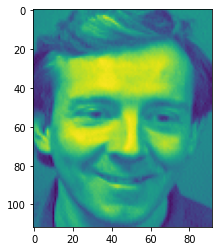

In [20]:
plt.imshow(ori_train[20])

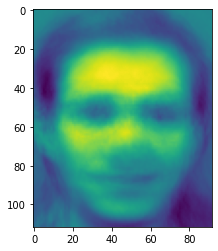

In [21]:
plt.imshow(train_eigen[20])

In [22]:
class PrincipalComponentAnalysis():

    
    def __init__(self, n_components):
        #n_components : 데이터를 축소시킬 목표 차원
        self.n_components = n_components
        
        self.eigen_mat = None
        
        self.eigen_val = None

        self.reduced_eigen_mat = None
        
    def fit(self, x):
        # data를 zero centered
        x = x - np.mean(x, axis=0, keepdims=True)
        
        n, d = x.shape
        
        cov = np.matmul(x.T, x)/n
        
        eigvals, eigvecs = np.linalg.eig(cov)
        
        eig_pairs = [(eigvals[i], eigvecs[:, i]) for i in range(d)]
        
        sorted_eig = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)
        
        self.eigen_mat = np.stack(list(map(lambda tup: tup[1], sorted_eig)), axis=1)
        
        self.eigen_val = np.array(list(map(lambda tup: tup[0], sorted_eig)))
        
    def transform(self, x):
        
        x = x - np.mean(x, axis=0, keepdims=True)
        
        if self.eigen_mat is None:
            print("You should fit model first!")
            return
        
        
        self.reduced_eigen_mat = self.eigen_mat[:, :self.n_components]
        
        
        results = np.matmul(x, self.reduced_eigen_mat)
        
        return results
    def reconstruct(self, data, x_transformed) :
        y = np.matmul(x_transformed, self.reduced_eigen_mat.T)+np.mean(data, axis=0, keepdims=True)
        y = y.reshape(y.shape[0],112,92)

        return y

In [23]:
pca = PrincipalComponentAnalysis(n_components=2)

In [24]:
pca.fit(train)

In [25]:
test_transformed = pca.transform(test)
test_transformed

array([[  942.20823801+0.j,  -958.70166748+0.j],
       [ -859.20774626+0.j, -2108.90911647+0.j],
       [  158.25463943+0.j,  -999.11666565+0.j],
       [ -607.98656821+0.j,  -342.60014636+0.j],
       [  126.04403178+0.j,  -645.64086105+0.j],
       [ -856.84022859+0.j,  -301.72302476+0.j],
       [  866.86319995+0.j,  -898.12218704+0.j],
       [ 1040.4227767 +0.j,  -880.06516201+0.j],
       [ -816.59148279+0.j, -1802.92828807+0.j],
       [  761.96011808+0.j,  -678.21265913+0.j],
       [-2523.12328202+0.j,   323.48300502+0.j],
       [-1998.85295331+0.j,  2380.02854264+0.j],
       [-2464.07688871+0.j,   191.82118684+0.j],
       [-2164.50008503+0.j,   235.83348184+0.j],
       [-1613.28745195+0.j,  2436.52641992+0.j],
       [-1517.21520591+0.j,  2159.33987099+0.j],
       [-2299.45186803+0.j,   355.36449876+0.j],
       [-2149.83061252+0.j,  2415.29556294+0.j],
       [-1912.41458795+0.j,  2312.65555276+0.j],
       [-2105.1692658 +0.j,   439.07241198+0.j],
       [  695.519348

In [26]:
test_transformed.shape

(50, 2)

In [27]:
pca.reduced_eigen_mat

array([[ 0.00377202+0.j, -0.01684105+0.j],
       [ 0.00372183+0.j, -0.01677177+0.j],
       [ 0.00378369+0.j, -0.01670947+0.j],
       ...,
       [ 0.00647606+0.j,  0.01145642+0.j],
       [ 0.00586232+0.j,  0.01017012+0.j],
       [ 0.00710824+0.j,  0.00929343+0.j]])

In [28]:
pca.reduced_eigen_mat.shape

(10304, 2)

In [29]:
test_reconstruct = pca.reconstruct(test, test_transformed)

In [30]:
test_reconstruct

array([[[110.39957281+0.j, 109.84587004+0.j, 110.58442711+0.j, ...,
         109.54018666+0.j, 108.46181533+0.j, 108.93237368+0.j],
        [110.36002319+0.j, 110.45045847+0.j, 110.30479933+0.j, ...,
         109.26415038+0.j, 108.7232159 +0.j, 108.9871911 +0.j],
        [109.82167837+0.j, 110.04713989+0.j, 110.28204058+0.j, ...,
         108.84842465+0.j, 109.11166965+0.j, 108.76285971+0.j],
        ...,
        [104.17365028+0.j, 103.60102931+0.j, 102.27563985+0.j, ...,
          69.72042543+0.j,  70.48956002+0.j,  68.5318786 +0.j],
        [105.15594202+0.j, 101.69063475+0.j, 103.69790006+0.j, ...,
          70.61897447+0.j,  72.36047291+0.j,  73.16274252+0.j],
        [104.92770238+0.j, 104.2436367 +0.j, 105.52511655+0.j, ...,
          72.91851294+0.j,  73.79340793+0.j,  74.08780675+0.j]],

       [[122.97530567+0.j, 122.432317  +0.j, 122.98777957+0.j, ...,
         123.08314424+0.j, 121.75525151+0.j, 122.14461182+0.j],
        [122.52503132+0.j, 123.03912043+0.j, 122.00508756+0.j

In [31]:
test_reconstruct.shape

(50, 112, 92)

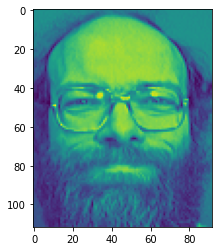

In [32]:
plt.imshow(ori_test[10].astype(np.float32))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


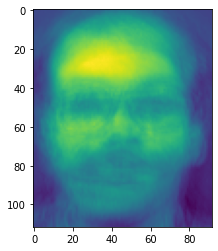

In [33]:
plt.imshow(test_reconstruct[10].astype(np.float32))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


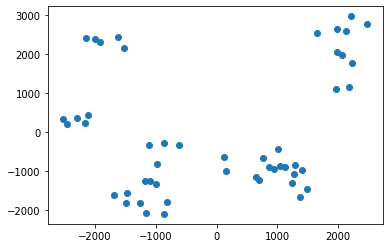

In [35]:
plt.scatter(test_transformed[:,0],test_transformed[:,1])